<h1>Posttest Praktikum Sistem Informasi </h1>

NIM **2109116074**

NAMA **Indra Maulana**


## Visualisasi

In [5]:
import pandas as pd
import seaborn as sns

In [20]:
# Buatlah datasetnya disini
df = pd.read_csv("ChurnBank.csv")

### Business Understanding

Sebagai direktur sebuah perusahaan, saya bisa menggunakan dataset churnbank.csv dan algoritma Naive Bayes untuk membantu mengoptimalkan strategi pengambilan keputusan dalam bisnis.

Tujuan penggunaan dataset ini adalah untuk memahami perilaku pelanggan dan melihat pola dari pelanggan yang meninggalkan bisnis (churn). Dataset ini mencakup informasi tentang profil pelanggan, seperti jenis kelamin, usia, status pernikahan, pendapatan, dan apakah mereka memiliki kartu kredit, serta informasi tentang kebiasaan transaksi dan aktivitas rekening.

Tujuan perusahaan adalah untuk meningkatkan retensi pelanggan dan mengurangi tingkat churn. Dengan memahami faktor-faktor yang memengaruhi keputusan pelanggan untuk meninggalkan bisnis, perusahaan dapat mengambil tindakan yang tepat untuk mempertahankan pelanggan dan mengurangi tingkat churn.

Penggunaan algoritma Naive Bayes akan membantu perusahaan dalam memprediksi apakah pelanggan akan churn atau tidak berdasarkan pada data historis dari perilaku pelanggan. Algoritma ini cocok untuk digunakan pada dataset ini karena dataset ini mengandung banyak variabel independen yang dapat memengaruhi tingkat churn. Naive Bayes juga dapat memberikan kemampuan untuk mengidentifikasi variabel mana yang paling penting dalam memprediksi churn sehingga perusahaan dapat mengambil tindakan yang tepat.


### Data Understanding

In [ ]:
# df1 isinya dataset dengan label target AttiredCustomer
# df2 dengan label bukan Attrired customer
# df3 dengan tabel untuk usia dibawah 50 tahun
# df4 untuk customer yang statusnya itu single

df_1 = df[df["Attrition_Flag"]=="Attrited Customer"]
df_2 = df[df["Attrition_Flag"]!="Attrited Customer"]
df_3 = df[df["Customer_Age"]<50]
df_4 = df[df["Marital_Status"]=="Single"]

In [ ]:
# Tampilkan info dataset (df.info()) dan berikan penjelasannya dalam bentuk teks atau comment
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20 non-null     int64  
 1   CLIENTNUM        20 non-null     int64  
 2   Attrition_Flag   20 non-null     object 
 3   Customer_Age     20 non-null     int64  
 4   Gender           20 non-null     object 
 5   Education_Level  20 non-null     object 
 6   Marital_Status   20 non-null     object 
 7   Income_Category  20 non-null     object 
 8   Card_Category    20 non-null     object 
 9   Credit_Limit     20 non-null     float64
dtypes: float64(1), int64(3), object(6)
memory usage: 1.7+ KB


Penjelasan:

1. Dataset ini terdiri dari 10 kolom.

2. Kolom-kolom tersebut adalah: Unnamed, CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Education_Level, Marital Status, Income_Category, Card_Category, dan Credit_Limit.

3. Terdapat tiga tipe data yang berbeda dalam dataset ini, yaitu integer (int64), float (float64), dan object.

4. Setiap kolom memiliki 20 nilai non-null, artinya tidak ada nilai yang hilang atau kosong dalam dataset ini.

5. Memori yang digunakan oleh dataset ini adalah sekitar 1.7+ KB.


In [21]:
#@title Opsional (nilai plus)
# Tampilkan nilai rata-rata, min,max, dan standar deviasi  untuk setiap kolom bertipe angka
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
nilai = pd.DataFrame({
    'mean': numeric_cols.mean(),
    'min': numeric_cols.min(),
    'max': numeric_cols.max(),
    'std': numeric_cols.std()
})
# print nilainya
print(nilai)

                      mean          min          max           std
Unnamed: 0    6.105100e+03        176.0      10084.0  2.850304e+03
CLIENTNUM     7.424893e+08  709222008.0  809844108.0  4.045524e+07
Customer_Age  4.725000e+01         32.0         59.0  7.859791e+00
Credit_Limit  8.114580e+03       1438.3      26792.0  8.331037e+03


#### Explore Data

##### Visualisasi Comparison

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

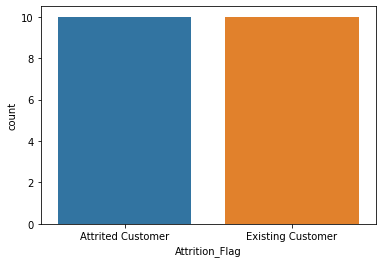

In [22]:
# Attired Customer dan Existing Customer
sns.countplot(data = df,x="Attrition_Flag")

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

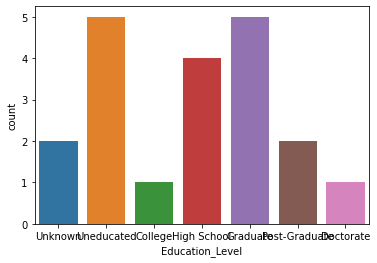

In [23]:
# Education level berdasarkan kategori
sns.countplot(data = df,x="Education_Level")

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

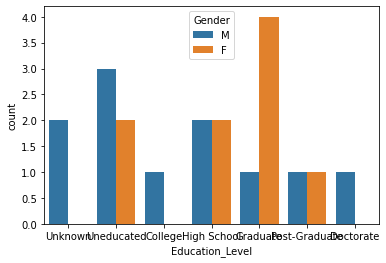

In [24]:
# Education level berdasarkan gendernya
sns.countplot(x='Education_Level', hue='Gender', data=df)

1. Visualisasi Pertama menunjukan Perbandingan pada status atrrition Customer tentang berapa banyak customer yang telah meninggalkan atau berhenti dan yang masih menggunakan produk atau layanan. Dan bisa dilihat pada hasil visualisasi nya menunjukkan banyaknya attrited customer dan existing customer ada pada nilai 10.
2. Visualisasi Kedua Menunjukkan banyaknya Kategori pada level edukasi dan banyaknya customer didalam setiap kategori.
3. Visualisasi Ketiga Menunjukka banyaknya Laki-laki dan perempuan dalam setiap kategori di level edukasi.

##### Visualisasi Distribution


<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

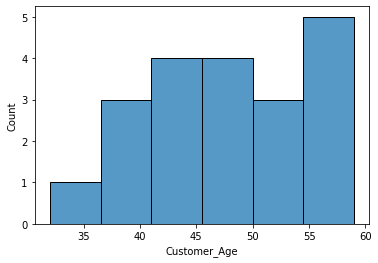

In [25]:
# Historgram untuk umur dan credit card limit
sns.histplot(data=df, x='Customer_Age')

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

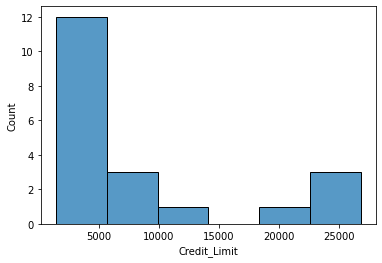

In [26]:
sns.histplot(data=df, x='Credit_Limit')


<AxesSubplot:xlabel='Customer_Age'>

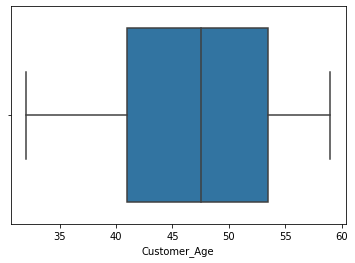

In [27]:
# Buatlah boxplot untuk umur dan credit card limit
sns.boxplot(data = df,x="Customer_Age")


<AxesSubplot:xlabel='Credit_Limit'>

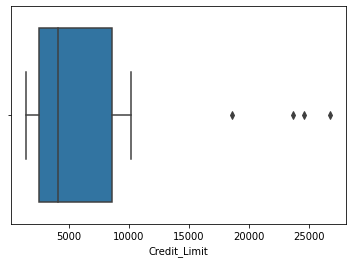

In [28]:
sns.boxplot(data = df,x="Credit_Limit")

1. Visualisasi Histogram pertama menunjukkan berapa banyak customer dalam umur umur tertentu.
2. Visualisasi Histogram Kedua menunjukkan berapa banyak customer dalam Credit Limit tertentu.
3. Visualisasi boxplot Pertama menggambarkan kumpulan data numerik berdasarkan Umur Customer.
4. Visualisasi boxplot Kedua menggambarkan kumpulan data numerik berdasarkan Credit Limit Customer.

##### Visualisasi Relationship




<AxesSubplot:xlabel='Customer_Age', ylabel='Credit_Limit'>

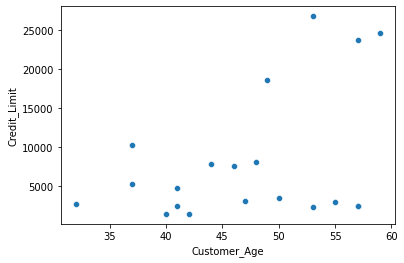

In [29]:
# Buatlah scatterplot untuk umur customer dan credit card limit
sns.scatterplot(data = df,x="Customer_Age",y="Credit_Limit")

##### Visualisasi Composition




In [37]:
# Buatlah pieplot untuk Income Category & Education Level
import plotly.express as px
px.pie(df,names="Income_Category")

In [38]:
px.pie(df,names="Education_Level")

### Opsional (Nilai Plus)

<AxesSubplot:xlabel='Gender', ylabel='Credit_Limit'>

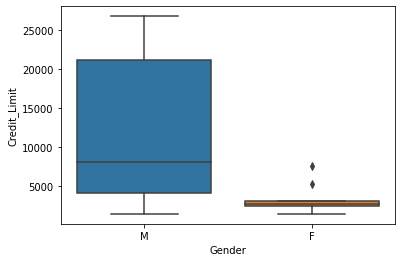

In [31]:
# Buatlah visualisasi boxplot Credit Card Limit dengan Jenis Kelamin sebagai pemisahnya (color)
sns.boxplot(data=df, x='Gender', y='Credit_Limit')


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

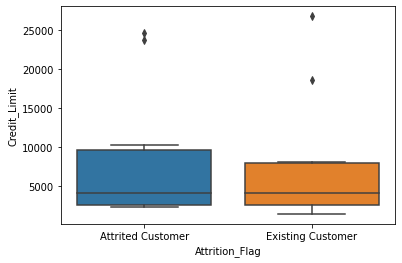

In [32]:
# Buatlah visualisasi boxplot Credit Card Limit dengan Attrition Flag sebagai pemisahnya (color)
sns.boxplot(data=df, x='Attrition_Flag', y='Credit_Limit')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Customer_Age'>

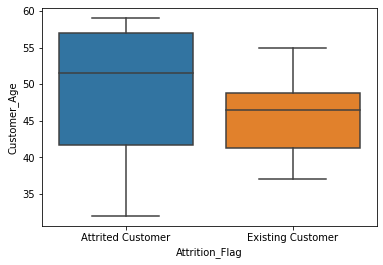

In [33]:
# Buatlah visualisasi boxplot Age dengan Attrition Flag sebagai pemisahnya (color)
sns.boxplot(data=df, x='Attrition_Flag', y='Customer_Age')

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

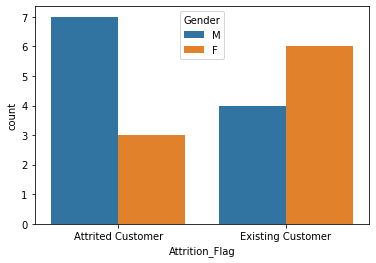

In [34]:
# Buatlah visualisasi countplot  Attrition Flag dengan jenis kelamin sebagai pemisahnya (color)
sns.countplot(x='Attrition_Flag', hue='Gender', data=df)

<AxesSubplot:>

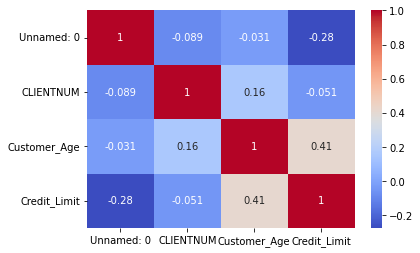

In [35]:
# Buatlah visualisasi heatmap untuk Setiap variabel numerik yang ada
numeric_cols = df.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')

## Algoritma Naive Bayes dan Preprocessing (pengenalan)

In [18]:
# hapus kolom
dfnb = pd.read_csv("ChurnBank.csv")
dfnb.drop(['Unnamed: 0', 'CLIENTNUM', 'Customer_Age', 'Credit_Limit'], axis=1, inplace=True)
# buat dataframe baru
df_baru = df.copy()
print(df_baru.head())

  Gender Education_Level Marital_Status Income_Category Card_Category  \
0      M         Unknown         Single     $40K - $60K          Blue   
1      M      Uneducated        Married     $60K - $80K          Blue   
2      M         College         Single    $80K - $120K          Blue   
3      M     High School        Unknown         $120K +          Blue   
4      F        Graduate         Single  Less than $40K          Blue   

      Attrition_Flag  
0  Attrited Customer  
1  Attrited Customer  
2  Attrited Customer  
3  Attrited Customer  
4  Attrited Customer  


In [19]:
# Membaca data training
df = pd.read_csv("ChurnBank.csv")

# Hapus data sesuai ketentuan
df = df.drop(["Unnamed: 0", "CLIENTNUM", "Customer_Age", "Credit_Limit"], axis=1)

# memindah data attrition_flag ke ujung kanan
cols = df.columns.tolist()
cols.remove('Attrition_Flag')
cols.append('Attrition_Flag')
df = df[cols]

# Menghitung jumlah data training dan data testing
N_train = len(df)

# Menghitung jumlah kelas target
target_counts = df.groupby('Attrition_Flag')['Attrition_Flag'].count()

# Menghitung probabilitas priori untuk setiap kelas target
prior_prob = target_counts / N_train

# Menghitung probabilitas kondisional untuk setiap fitur pada setiap kelas target
cond_prob = {}
for col in df.columns[:-1]:
    cond_prob[col] = {}
    for val in df[col].unique():
        for target in df['Attrition_Flag'].unique():
            count = len(df[(df[col] == val) & (df['Attrition_Flag'] == target)])
            cond_prob[col][(val, target)] = count / target_counts[target]

# Fungsi Naive Bayes Classifier
def naive_bayes(x):
    prob_yes = prior_prob['Attrited Customer']
    prob_no = prior_prob['Existing Customer']
    for i, col in enumerate(df.columns[:-1]):
        prob_yes *= cond_prob[col][(x[i], 'Attrited Customer')]
        prob_no *= cond_prob[col][(x[i], 'Existing Customer')]
    if prob_no > prob_yes:
        return ('Existing Customer', prob_no)
    else:
        return ('Attrited Customer', prob_yes)

# Contoh penggunaan fungsi naive_bayes
output = naive_bayes(["F","Uneducated","Single","Unknown","Blue"])
print("\nHASIL =", output)


HASIL = ('Existing Customer', 0.0135)
